# 1st : Chips

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chisquare, ttest_1samp
import scipy.stats as stat
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('~/Documents/Ia-Datasets/data2.csv', sep=';')

data

,Preference,Sale,Sucre,Acidite,Croustillant
0,1,3,3,3,3
1,1,1,2,3,1
2,1,2,2,5,1
3,1,1,4,3,1
4,2,3,3,2,2
...,...,...,...,...,...
95,9,3,2,3,2
96,9,3,3,2,4
97,9,3,3,3,4
98,9,3,3,3,3


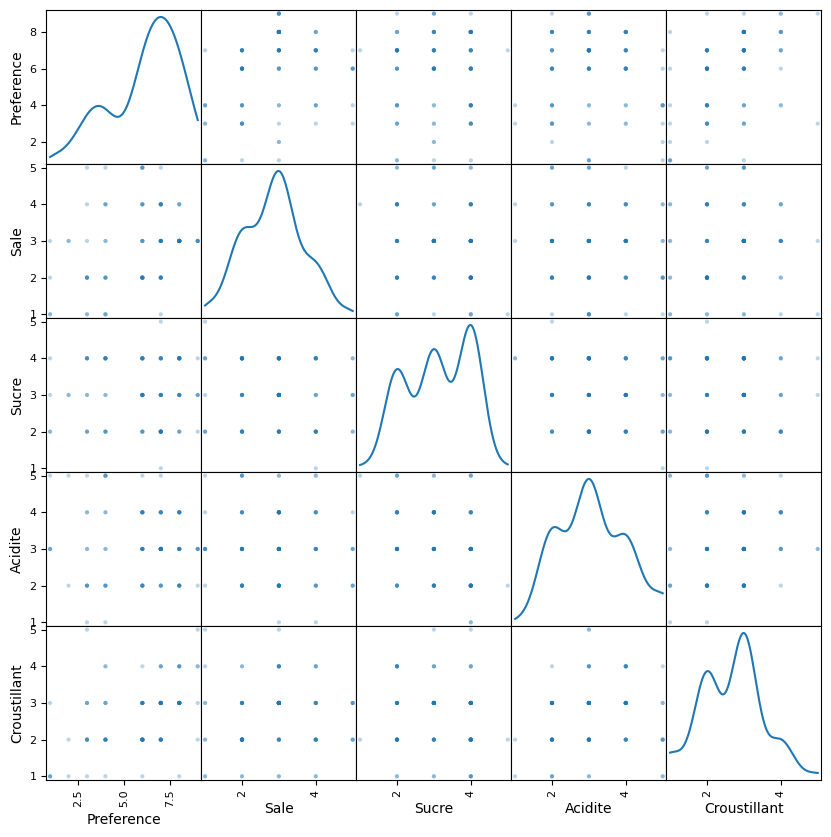

In [59]:
pd.plotting.scatter_matrix(data, alpha=0.3, figsize=(10, 10), diagonal='kde');

In [60]:
corr = data.corr()

corr

,Preference,Sale,Sucre,Acidite,Croustillant
Preference,1.000000,0.280465,0.031249,-0.063211,0.438298
Sale,0.280465,1.000000,-0.124927,-0.100368,0.065241
Sucre,0.031249,-0.124927,1.000000,-0.237212,-0.068730
Acidite,-0.063211,-0.100368,-0.237212,1.000000,0.132331
Croustillant,0.438298,0.065241,-0.068730,0.132331,1.000000


In [61]:
corr.style.background_gradient().format("{:.2f}")

,Preference,Sale,Sucre,Acidite,Croustillant
Preference,1.00,0.28,0.03,-0.06,0.44
Sale,0.28,1.00,-0.12,-0.10,0.07
Sucre,0.03,-0.12,1.00,-0.24,-0.07
Acidite,-0.06,-0.10,-0.24,1.00,0.13
Croustillant,0.44,0.07,-0.07,0.13,1.00


In [62]:
scores = pd.read_csv('~/Documents/Ia-Datasets/scores/score-1.csv', sep=';', header=None)
scores.columns = ['score']
scores

,score
0,11
1,7
2,7
3,12
4,7
...,...
65,10
66,8
67,8
68,6


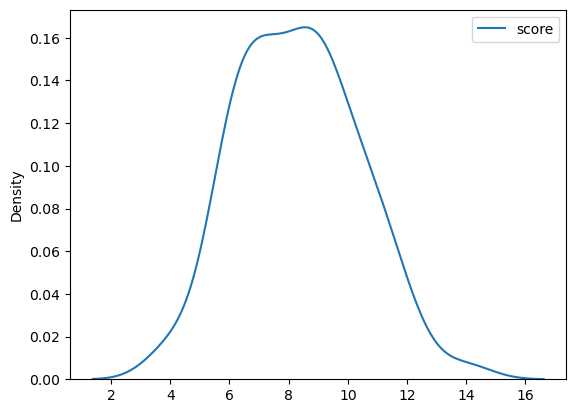

In [63]:
# regarder comment se comporte la distribution. Je devine une loi normale.

sns.kdeplot(scores);

DescribeResult(nobs=70, minmax=(array([4]), array([14])), mean=array([8.31428571]), variance=array([4.16066253]), skewness=array([0.23933309]), kurtosis=array([-0.26155924]))

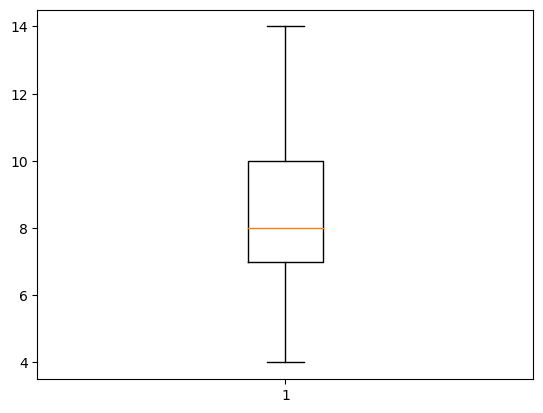

In [64]:
# Noté les positionnement des valeurs.
plt.boxplot(scores['score']);

stat.describe(scores)

In [65]:
stat.normaltest(scores)

# 0.66 > 0.05 : distribution normale

NormaltestResult(statistic=array([0.80698531]), pvalue=array([0.66798293]))

#### Un seul echantillon à comparer à une norme qui est 7

#### Est-ce que ce score est signigicatif

In [66]:
stat.ttest_1samp(scores, popmean=7)

TtestResult(statistic=array([5.3908539]), pvalue=array([9.2290647e-07]), df=array([69]))

Cette moyenne est significative si elle est éloignée de la moyenne de la population.
Ici elle l'est énormément.

In [67]:
scores3 = pd.read_csv('~/Documents/Ia-Datasets/scores/score-3.csv', sep=';', header=None)

scores3.tail(10)

,0,1
43,457,NaN
44,350,NaN
45,415,NaN
46,465,NaN
47,474,NaN
48,578,NaN
49,427,NaN
50,376,NaN
51,477,NaN
52,445,NaN


In [75]:
scores.columns = ['GROUPE1', 'GROUPE2']

scores3['GROUPE1'].dropna(inplace=True)
scores3['GROUPE2'].dropna(inplace=True)

scores3.describe()


ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

TypeError: 'NoneType' object is not iterable

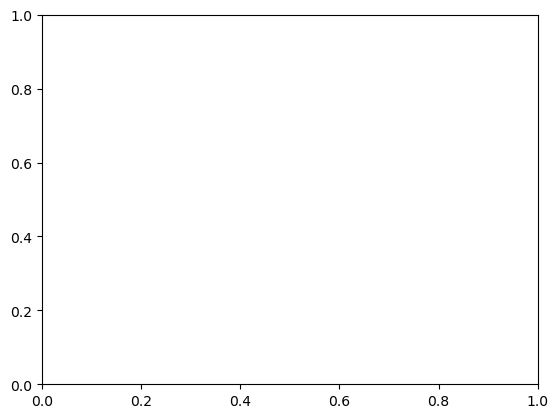

In [ ]:
sns.kdeplot(scores3);

In [ ]:
g1 = scores3['1']

g2 = scores3['2']

plt.boxplot(scores3['1'], scores3['2']);

KeyError: '1'

In [ ]:
stat.normaltest(g1)


In [ ]:
stat.normaltest(g2)

In [ ]:
stat.levene(g1, g2)

In [ ]:
stat.ttest_ind(g1, g2, equal_var=True)

Ttest_indResult(statistic=array([nan, nan]), pvalue=array([nan, nan]))

## Données apparié score 4

In [81]:
scores4 = pd.read_csv('~/Documents/Ia-Datasets/scores/score-4.csv', sep=';', index_col='SUJETS')

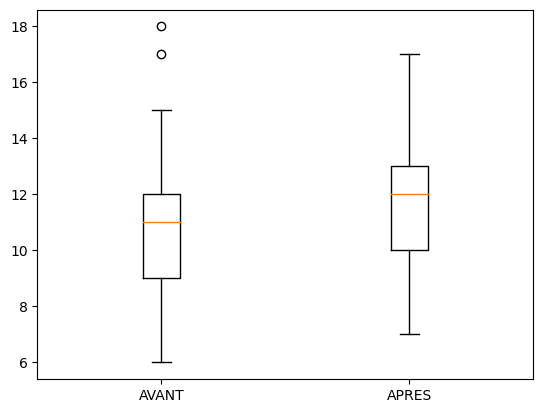

In [82]:
plt.boxplot(scores4, whis=100, labels=['AVANT', 'APRES']);

In [84]:
scores4.describe()

,AVANT,APRES
count,21.000000,21.000000
mean,11.190476,11.857143
std,3.187774,2.851065
min,6.000000,7.000000
25%,9.000000,10.000000
50%,11.000000,12.000000
75%,12.000000,13.000000
max,18.000000,17.000000


In [85]:
stat.normaltest(scores4)

NormaltestResult(statistic=array([0.99151668, 0.54443541]), pvalue=array([0.60910882, 0.76168842]))

In [86]:
stat.levene(scores4['AVANT'], scores4['APRES'])

# La variance est différente, on utilise donc le ttest

LeveneResult(statistic=0.007127583749109002, pvalue=0.9331396502303381)

In [87]:
stat.ttest_rel(scores4['AVANT'], scores4['APRES'])

# p value > 0.05 : pas de différence significative

# Pas assez important pour metre en avant une quelconque amélioration de la formation.

TtestResult(statistic=-0.6645602896268298, pvalue=0.513921876314335, df=20)

# Etude de la familiarité des mots sur l'apprentissage et la mémorisation de ceux-ci ? Score-5

In [88]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison, tukeyhsd

scores5 = pd.read_csv('~/Documents/Ia-Datasets/scores/score-14.csv', sep=';', index_col='SCORE')

scores5.head()

In [90]:
mc = MultiComparison(scores5.index, scores5['MUSIQUE'])

In [91]:
resultats = mc.tukeyhsd()

print(resultats)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
CLASSIQUE   COUNTRY  -2.8329 0.8391  -10.526  4.8603  False
CLASSIQUE      JAZZ  -3.9657 0.6004 -11.6589  3.7275  False
CLASSIQUE POPULAIRE   1.8179 0.9635  -5.8753   9.511  False
CLASSIQUE RELAXANTE   5.7464 0.2344  -1.9468 13.4396  False
  COUNTRY      JAZZ  -1.1329 0.9937   -8.826  6.5603  False
  COUNTRY POPULAIRE   4.6507 0.4434  -3.0425 12.3439  False
  COUNTRY RELAXANTE   8.5793 0.0213   0.8861 16.2725   True
     JAZZ POPULAIRE   5.7836 0.2286  -1.9096 13.4768  False
     JAZZ RELAXANTE   9.7121 0.0064    2.019 17.4053   True
POPULAIRE RELAXANTE   3.9286 0.6091  -3.7646 11.6218  False
-----------------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
CLASSIQUE,COUNTRY,-2.8329,0.8391,-10.526,4.8603,False
CLASSIQUE,JAZZ,-3.9657,0.6004,-11.6589,3.7275,False
CLASSIQUE,POPULAIRE,1.8179,0.9635,-5.8753,9.511,False
CLASSIQUE,RELAXANTE,5.7464,0.2344,-1.9468,13.4396,False
COUNTRY,JAZZ,-1.1329,0.9937,-8.826,6.5603,False
COUNTRY,POPULAIRE,4.6507,0.4434,-3.0425,12.3439,False
COUNTRY,RELAXANTE,8.5793,0.0213,0.8861,16.2725,True
JAZZ,POPULAIRE,5.7836,0.2286,-1.9096,13.4768,False
JAZZ,RELAXANTE,9.7121,0.0064,2.019,17.4053,True
POPULAIRE,RELAXANTE,3.9286,0.6091,-3.7646,11.6218,False


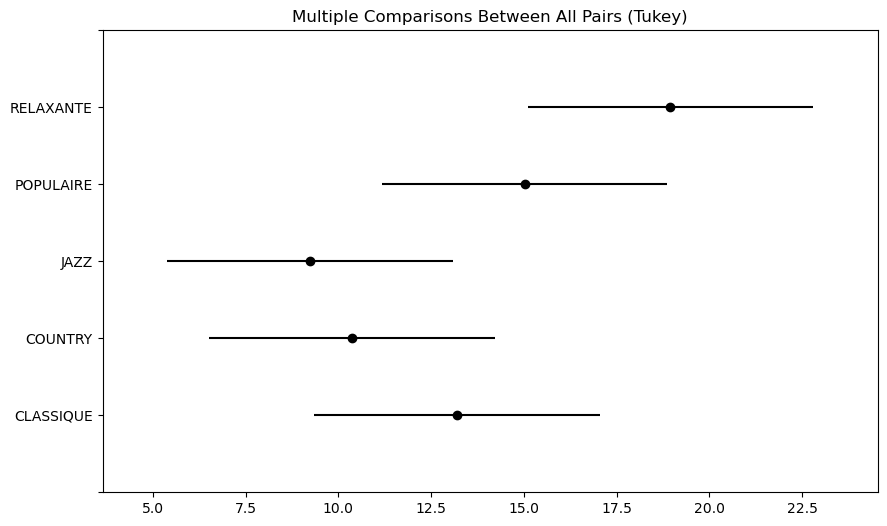

In [95]:
mc2 = pairwise_tukeyhsd(endog=scores5.index, groups=scores5['MUSIQUE'], alpha=0.05)

mc2.plot_simultaneous();

mc2.summary()

In [ ]:
# Check de la superposition entre ces distrbution#
# Superposition entre les distributions = différence significative.

# Ex La musique relaxant apporte un meilleur temps d'attente par rapport au jazz 